In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
from numpy.linalg import norm

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

%matplotlib inline

from galaxy.timecourse import TimeCourse

In [2]:
tc = TimeCourse()

In [3]:
MW = tc.read_sigmas_db('MW')
t = MW['t']
sigma_MW = MW['sigma']
M31 = tc.read_sigmas_db('M31')
sigma_M31 = M31['sigma']
M33 = tc.read_sigmas_db('M33')
sigma_M33 = M33['sigma']

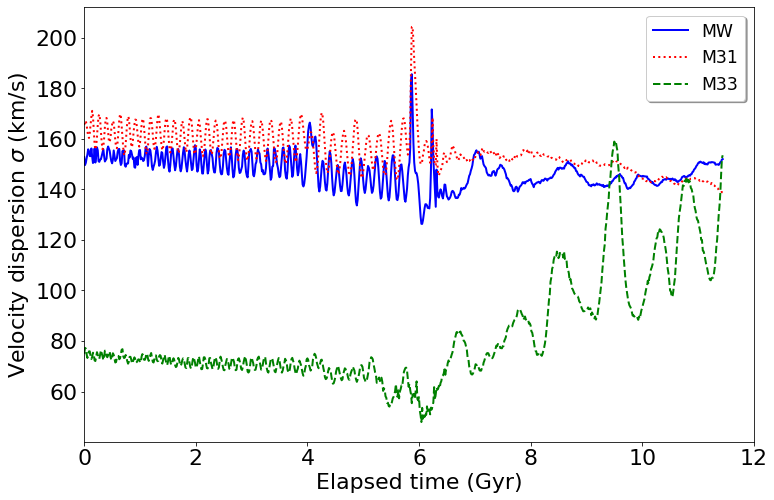

In [6]:
fig = plt.figure(figsize=(12,8))

# # set up the left subplot
# ax0 = plt.subplot(131)

# add the curves
plt.plot(t, sigma_MW, 'b-', lw=2, label='MW')
plt.plot(t, sigma_M31, 'r:', lw=2, label='M31')
plt.plot(t, sigma_M33, 'g--', lw=2, label='M33')

n=50
# plt.plot(t[:n], sigma_MW[:n], 'bo', lw=2, label='MW')
# plt.plot(t[:n], sigma_M31[:n], 'ro', lw=2, label='M31')
# plt.plot(t[:n], sigma_M33[:n], 'go', lw=2, label='M33')
plt.legend(fontsize='xx-large', shadow=True)

# Add axis labels
plt.xlabel('Elapsed time (Gyr)', fontsize=22)
plt.ylabel('Velocity dispersion $\sigma$ (km/s)', fontsize=22)

#set axis limits
#plt.ylim(0,200)
plt.xlim(0, 12)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.savefig('vel_disp.pdf', rasterized=True, dpi=350);